In [1]:
import requests
from bs4 import BeautifulSoup

import spacy
nlp=spacy.load("en_core_web_sm")

import warnings
warnings.filterwarnings("ignore")

import re

import pandas as pd

from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk import FreqDist

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extracting the products

In [2]:
tr_link1="https://www.trustradius.com/crm?f=0&s=237"
link1=requests.get(tr_link1).text

tr_link2="https://www.trustradius.com/crm?f=100&s=237"
link2=requests.get(tr_link2).text

tr_link3="https://www.trustradius.com/crm?f=200&s=100"
link3=requests.get(tr_link3).text

links=[link1,link2,link3]

product_list=[]

for i in links:
    soup=BeautifulSoup(i,"lxml")
    for tag in soup.find_all(True, {'class':['product-link']}):
    
        if tag.name=="a" and tag.string!=None: 
            product_list.append(tag.string)

In [3]:
len(list(set(product_list)))

0

## Product "Insightly" Features

In [4]:
feature_url="https://www.trustradius.com/products/insightly/reviews#1"
soup=BeautifulSoup(requests.get(feature_url).text,"lxml")

In [5]:
features=[]
for tag in soup.find_all(True, {'class':['feature-group-name','supported-feature']}):
    if tag.name=="b" :        
        k=tag.text
    if tag.name=="h5" :        
        k=tag.text
    if tag.name=="div":
        features.append((k+tag.text[11:]).replace("Features","").replace("management",""))

In [6]:
features

['Sales Force Automation Customer data  / contact ',
 'Sales Force Automation Workflow ',
 'Sales Force Automation Territory ',
 'Sales Force Automation Opportunity ',
 'Sales Force Automation Integration with email client (e.g., Outlook or Gmail)',
 'Sales Force Automation Quote & order ',
 'Sales Force Automation Interaction tracking',
 'Marketing Automation Lead ',
 'Marketing Automation Email marketing',
 'CRM Project Management Task ',
 'CRM Project Management Reporting',
 'CRM Reporting & Analytics Pipeline visualization',
 'CRM Reporting & Analytics Customizable reports',
 'Customization Custom fields',
 'Customization Custom objects',
 'Customization API for custom integration',
 'Security Role-based user permissions',
 'Security Single sign-on capability',
 'Integrations with 3rd-party Software Marketing automation',
 'Platform Mobile access',
 'Additional AICPA SOC II Type 1 and Type 2 audited and accredited, and US/EU Privacy Shield and US/Swiss Privacy Shield certified.',
 

## Reviews Extraction

In [7]:
reviews_url="https://www.trustradius.com/products/insightly/reviews?f="
reviews_url1=requests.get(reviews_url).text

In [8]:
list_of_links=[]
for i in range(0,350,25):
    
    final_link=(reviews_url+str(i))
    final_link=requests.get(final_link).text
    list_of_links.append(final_link)   

In [9]:
reviews=[]
for i in list_of_links:
    soup=BeautifulSoup(i,"lxml")
    for tag in soup.find_all(True,{'class':['review-questions']}):

        if tag.name=="div":   
            reviews.append(tag.text[30:].replace("Likelihood to Recommend"," ").replace("Pros and Cons"," "))            
len(reviews)

317

In [10]:
reviews[1]

'We\'re using Insightly primarily for our sales team as a CRM system, tracking organisations, contacts, opportunities and in the future, projects.This information is coupled with our budgets to provide the proverbial "BIGGER PICTURE" Organizational, contact and opportunity management. We\'re able to store relevant data about all three specific information areas. In particular, the progression of opportunities through custom phases is a big plus for us.Great reports that are customizable to my department\'s needs.The easy user interface made the transition from our previous product relatively pain free for our users. Not to say what we used, but you had to be a wise old \'sage\' to use it...EditIntegration to Xero should allow us to quote directly from Insightly, or be able to view our Xero quotes in Insightly.It would also be great to be able to track quotes against a budget or target! Well suited to client management.Not too well suited to quoting!Read Jeremy Grant\'s full review'

## Removing Stopwords and tokenisation

In [11]:
final_feature_list=[]
for i in features:
    token_words=[]
    i=re.sub("\W+"," ",i)
    for j in i.split(" "):
        if j not in stop_words and len(j)>2:
            token_words.append(j)
    final_feature_list.append(token_words)

In [12]:
final_feature_list[5]

['Sales', 'Force', 'Automation', 'Quote', 'order']

In [27]:
final_review_list=[]
for i in reviews:
    token_words=[]
    i=re.sub("\W+"," ",i)
    for j in i.split(" "):
        if j not in stop_words and len(j)>2 and j.lower()!="insightly":
            token_words.append(j)
    final_review_list.append(token_words)

In [25]:
len(final_review_list)

317

## Plotting Most Frequent words

In [15]:
def freq_words(x, terms = 30):
    words=" "
    for j in x:
        for i in j:
            words=words+i+" "
    
    words = words.split()

    fdist = FreqDist(words)
    words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

    # selecting top 20 most frequent words
    d = words_df.nlargest(columns="count", n = terms) 
    plt.figure(figsize=(20,5))
    ax = sns.barplot(data=d, x= "word", y = "count")
    ax.set(ylabel = 'Count')
    plt.show()

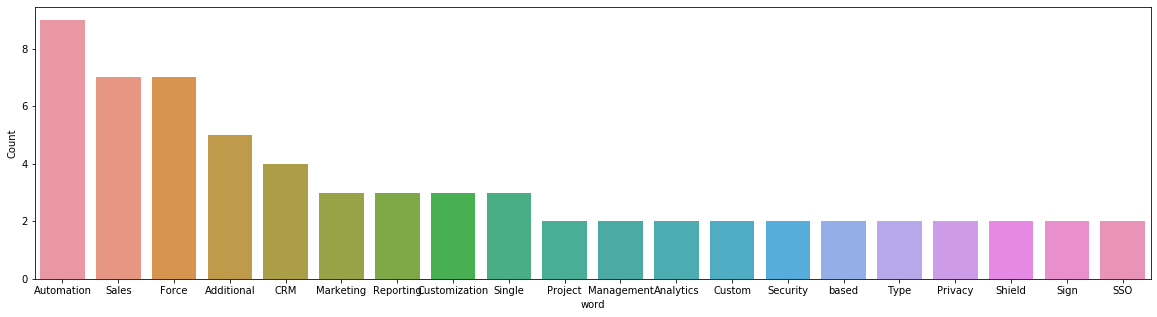

In [16]:
freq_words(final_feature_list,terms=20)

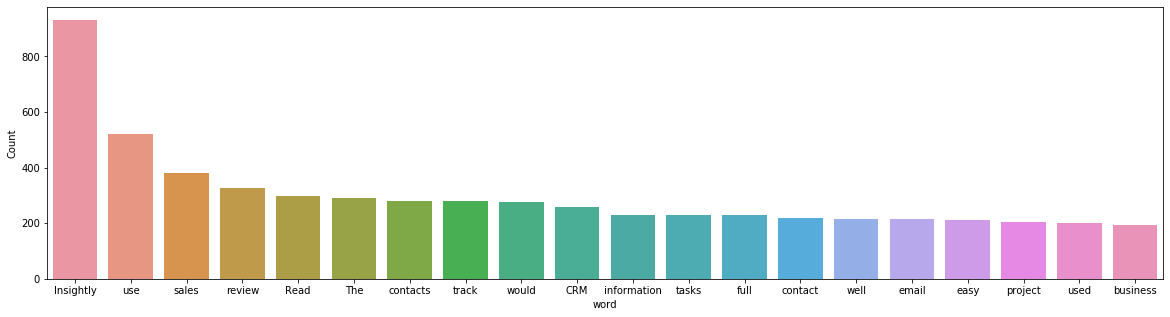

In [17]:
freq_words(final_review_list,terms=20)